In [1]:
import numpy as np
import pandas as pd
import _pickle as cPickle
from deap import base, creator, tools, algorithms
from sklearn.preprocessing import LabelEncoder

In [2]:
df=pd.read_csv('C:/Users/Gabriel/Pasta/Machine Learning/BINÁRIO_HRV.csv')

In [3]:
df

,CLASSE,IAH,T90,SATMIN,IDADE,ALTURA,PESO,IMC,PIP,W0,...,AC,DC,PORTAS,GUZIKS,EHLERS,BIN0V,BIN1V,BIN2V,F,M
0,NORMAL,3.07,0.03,87,35,1.660000,69.600000,25.257657,49.5922,4.0768,...,-11.9732,10.4526,46.6220,47.8699,-0.2132,17.2253,68.7786,13.9962,1.0,0.0
1,NORMAL,1.93,0.00,92,50,1.590000,98.700000,39.041177,48.4985,6.3788,...,-6.3287,6.1144,49.2434,48.9933,-0.1273,24.8110,60.5646,14.6244,1.0,0.0
2,NORMAL,0.40,0.00,92,27,1.800000,91.000000,28.086420,51.0391,14.4829,...,-13.4549,14.9428,52.3657,57.2754,2.4017,27.1533,51.4026,21.4442,0.0,1.0
3,NORMAL,3.65,1.37,41,61,1.590000,103.700000,41.018947,60.8169,5.6235,...,-14.5812,14.4796,50.0457,50.2848,0.0960,11.2946,58.4855,30.2198,1.0,0.0
4,NORMAL,1.15,0.07,88,26,1.649234,59.700000,21.948760,47.7805,1.4780,...,-29.3785,35.4046,54.5368,56.3937,1.4414,12.7135,79.9516,7.3349,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,APNEICO,117.50,34.30,69,63,1.620000,89.500000,34.103033,54.1595,13.1081,...,-11.6846,10.8219,47.8445,48.0653,-0.2136,31.9158,46.3412,21.7430,1.0,0.0
287,APNEICO,72.00,68.40,67,64,1.640000,127.000000,47.218917,64.2736,1.0004,...,-5.2141,7.1196,57.4381,57.5743,1.4235,9.6522,61.7281,28.6197,1.0,0.0
288,APNEICO,33.80,1.80,82,51,1.650000,94.200000,34.600551,48.8423,9.6049,...,-19.3183,21.7097,52.3061,56.6817,2.0795,24.6303,59.7656,15.6041,0.0,1.0
289,APNEICO,34.30,4.60,83,59,1.649234,89.262007,32.817260,62.6354,5.1821,...,-3.5383,4.1281,52.1756,53.5385,0.7252,21.7171,52.3949,25.8880,0.0,1.0


In [4]:
#separando conjunto de teste e de treino
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.3, random_state=42)

In [5]:
train_set.head()

,CLASSE,IAH,T90,SATMIN,IDADE,ALTURA,PESO,IMC,PIP,W0,...,AC,DC,PORTAS,GUZIKS,EHLERS,BIN0V,BIN1V,BIN2V,F,M
258,APNEICO,36.3,23.6,75,67,1.61,76.0,29.319856,75.0727,4.2549,...,-1.2289,1.3699,51.0043,51.3277,0.2126,23.9461,42.7151,33.3388,1.0,0.0
86,NORMAL,14.4,14.4,81,51,1.52,48.0,20.775623,69.9003,1.7170,...,-7.1137,6.5278,47.4961,46.7781,-0.5562,5.5659,56.1571,38.2771,1.0,0.0
229,APNEICO,49.2,10.8,77,70,1.64,69.0,25.654372,50.9938,12.7780,...,-9.6844,9.9350,51.1953,50.8643,0.1930,31.9211,52.4566,15.6223,0.0,1.0
92,NORMAL,5.0,0.2,87,36,1.69,74.0,25.909457,54.0109,3.0068,...,-11.9485,10.7005,48.5700,51.0898,0.2328,16.2400,69.8136,13.9465,0.0,1.0
97,NORMAL,14.9,1.4,83,27,1.55,70.0,29.136316,50.3281,5.6408,...,-6.2342,8.9840,51.3459,52.4776,0.4417,29.3564,58.4494,12.1942,1.0,0.0


In [6]:
test_set.head()

,CLASSE,IAH,T90,SATMIN,IDADE,ALTURA,PESO,IMC,PIP,W0,...,AC,DC,PORTAS,GUZIKS,EHLERS,BIN0V,BIN1V,BIN2V,F,M
84,NORMAL,6.3,0.0,90,42,1.610000,108.000000,41.665059,54.4808,6.0207,...,-6.1145,6.4501,51.3422,52.2414,0.4297,27.6741,59.3422,12.9837,1.0,0.0
259,APNEICO,55.5,2.4,85,54,1.560000,77.300000,31.763642,59.7655,5.2408,...,-6.0373,6.1587,50.8726,51.4137,0.4595,23.5269,56.0213,20.4518,1.0,0.0
45,NORMAL,2.2,2.0,82,53,1.640000,65.000000,24.167162,58.2716,5.4463,...,-7.5442,7.9502,51.4894,51.6891,0.4140,17.6156,60.0317,22.3527,1.0,0.0
176,APNEICO,26.6,9.2,70,65,1.650000,122.000000,44.811754,59.9173,1.7589,...,-9.5779,6.8927,48.0135,48.4821,-0.1614,9.4193,68.5894,21.9913,1.0,0.0
143,APNEICO,19.3,0.0,91,66,1.649234,89.262007,32.817260,47.7825,24.3318,...,-7.1254,10.2476,57.5344,61.9283,3.2136,44.2501,35.7581,19.9918,0.0,1.0


In [7]:
y_T = train_set['CLASSE'].copy()
X_T = train_set.iloc[:, 2:].copy()
y_T.value_counts()

CLASSE
APNEICO    129
NORMAL      74
Name: count, dtype: int64

In [8]:
X_T

,T90,SATMIN,IDADE,ALTURA,PESO,IMC,PIP,W0,W1,W2,...,AC,DC,PORTAS,GUZIKS,EHLERS,BIN0V,BIN1V,BIN2V,F,M
258,23.60,75,67,1.61,76.0,29.319856,75.0727,4.2549,11.3053,39.4062,...,-1.2289,1.3699,51.0043,51.3277,0.2126,23.9461,42.7151,33.3388,1.0,0.0
86,14.40,81,51,1.52,48.0,20.775623,69.9003,1.7170,10.4227,64.2845,...,-7.1137,6.5278,47.4961,46.7781,-0.5562,5.5659,56.1571,38.2771,1.0,0.0
229,10.80,77,70,1.64,69.0,25.654372,50.9938,12.7780,34.7683,39.3050,...,-9.6844,9.9350,51.1953,50.8643,0.1930,31.9211,52.4566,15.6223,0.0,1.0
92,0.20,87,36,1.69,74.0,25.909457,54.0109,3.0068,41.3305,46.3030,...,-11.9485,10.7005,48.5700,51.0898,0.2328,16.2400,69.8136,13.9465,0.0,1.0
97,1.40,83,27,1.55,70.0,29.136316,50.3281,5.6408,50.0402,32.0461,...,-6.2342,8.9840,51.3459,52.4776,0.4417,29.3564,58.4494,12.1942,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,18.39,49,32,1.60,123.7,48.320312,52.5720,8.5143,39.1033,38.5719,...,-9.0357,8.4255,48.2910,49.9403,-0.0504,25.6497,54.3417,20.0087,1.0,0.0
71,18.70,73,56,1.56,85.0,34.927679,61.2185,3.0387,20.9251,65.3840,...,-11.6971,11.4989,49.8138,51.2127,0.4347,9.1912,67.6111,23.1977,1.0,0.0
106,0.70,79,47,1.48,70.0,31.957633,58.2807,2.5312,33.7759,50.0790,...,-7.9992,7.7740,52.0880,53.6257,0.7734,13.8376,66.4834,19.6790,1.0,0.0
270,99.70,53,40,1.85,188.0,54.930606,61.2457,4.1517,27.5211,48.8306,...,-5.0520,5.8209,52.2840,52.9548,0.4492,16.9553,61.9908,21.0539,0.0,1.0


In [9]:
from sklearn.experimental import enable_iterative_imputer

In [10]:
from imblearn.over_sampling import SMOTE
#Realiza o over-sampling
smote = SMOTE()
from sklearn.impute import IterativeImputer as imputer
X_T, y_T = smote.fit_resample(train_set.iloc[:, 2:], train_set['CLASSE'],)
from collections import Counter
print(y_T.value_counts())

CLASSE
APNEICO    129
NORMAL     129
Name: count, dtype: int64


In [11]:
X_T

,T90,SATMIN,IDADE,ALTURA,PESO,IMC,PIP,W0,W1,W2,...,AC,DC,PORTAS,GUZIKS,EHLERS,BIN0V,BIN1V,BIN2V,F,M
0,23.600000,75,67,1.610000,76.000000,29.319856,75.072700,4.254900,11.305300,39.406200,...,-1.228900,1.369900,51.004300,51.327700,0.212600,23.946100,42.715100,33.338800,1.000000,0.000000
1,14.400000,81,51,1.520000,48.000000,20.775623,69.900300,1.717000,10.422700,64.284500,...,-7.113700,6.527800,47.496100,46.778100,-0.556200,5.565900,56.157100,38.277100,1.000000,0.000000
2,10.800000,77,70,1.640000,69.000000,25.654372,50.993800,12.778000,34.768300,39.305000,...,-9.684400,9.935000,51.195300,50.864300,0.193000,31.921100,52.456600,15.622300,0.000000,1.000000
3,0.200000,87,36,1.690000,74.000000,25.909457,54.010900,3.006800,41.330500,46.303000,...,-11.948500,10.700500,48.570000,51.089800,0.232800,16.240000,69.813600,13.946500,0.000000,1.000000
4,1.400000,83,27,1.550000,70.000000,29.136316,50.328100,5.640800,50.040200,32.046100,...,-6.234200,8.984000,51.345900,52.477600,0.441700,29.356400,58.449400,12.194200,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,36.701481,82,66,1.608988,77.966262,30.215634,61.518281,6.483368,26.343985,43.339509,...,-4.355818,4.400285,50.410185,50.266726,0.046271,28.057735,50.245856,21.696409,1.000000,0.000000
254,0.745424,86,50,1.672733,79.000425,28.229209,55.880380,6.769617,37.361138,37.399716,...,-5.284573,5.973276,51.144945,51.589340,0.283620,31.621234,52.193532,16.185234,1.000000,0.000000
255,0.000000,89,35,1.608185,64.070772,24.810132,56.497496,5.164954,37.709746,39.597223,...,-7.535595,8.355831,48.506266,49.337178,0.107763,22.624797,56.800484,20.574666,0.464614,0.535386
256,35.452306,82,65,1.514278,77.212533,33.641543,52.984241,6.014144,40.047420,42.878982,...,-13.255680,13.050704,49.732106,51.011262,0.443400,20.445576,62.275672,17.278853,1.000000,0.000000


In [12]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier(random_state=7)
RF.fit(X_T,y_T)

RandomForestClassifier(random_state=7)

In [13]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
y_t = test_set['CLASSE'].copy()
X_t = test_set.iloc[:, 2:].copy()
print(y_t.value_counts())

predict=RF.predict(X_t)
accuracy_score(predict,y_t)

CLASSE
APNEICO    52
NORMAL     36
Name: count, dtype: int64


0.6704545454545454

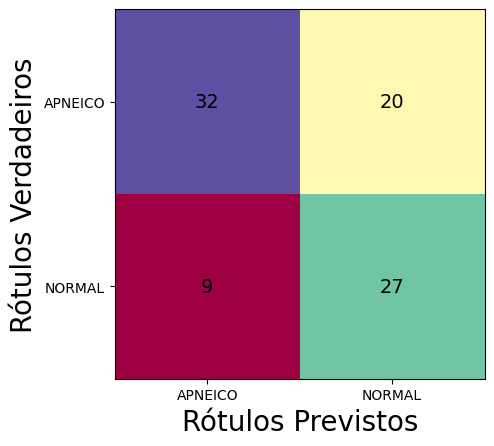

In [14]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

unique_labels = np.unique(y_t)
conf_matrix = confusion_matrix(y_t, predict, labels=unique_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=unique_labels)
disp.plot(cmap="Spectral", colorbar=False, values_format='d')
for text in disp.im_.axes.texts:
    text.set_color('black')
    text.set_fontsize(14)
plt.xlabel('Rótulos Previstos', fontsize=20)
plt.ylabel('Rótulos Verdadeiros', fontsize=20)
plt.show()

## Implementando o Algoritmo Genético

In [15]:
import deap
from functools import partial
from deap import base, creator, tools, algorithms
import random
import pandas as pd 
import numpy as np
from deap import base, creator, tools, algorithms

In [16]:
# Converter as linhas do DataFrame (excluindo a classe) em listas de características
#Aqui eu estava erroneamente passando os dados de treinamento e não os dados novos, se eu passo os dados de treinamento posteriormente não faz sentido comparar com os dados novos

colunas_features = train_set.drop(columns=['CLASSE', 'IAH']).columns
individuos_iniciais = train_set[colunas_features].values.tolist()
classes_iniciais = train_set['CLASSE'].tolist()

# Criar a classe de aptidão e o indivíduo
creator.create("FitnessMax", base.Fitness, weights=(1.0,))  # Maximização
creator.create("Individual", list, fitness=creator.FitnessMax)

In [17]:
print(individuos_iniciais[5])
predicT=RF.predict(X_T)
print(predicT[5])

[0.1, 89.0, 48.0, 1.83, 99.0, 29.56194571351787, 55.0404, 7.8663, 34.2416, 42.7749, 15.1172, 55.2466, 36.39, 1.5441, 6.8193, 455.5005, 140.9598, 41.6113, 74.8181, 25.1819, 3.3932, 940.8828, 41.1181, 12.6073, 1.5935, 1.5317, 1.0143, 0.5895, 2.4482, 3.6933, 2.4551, 0.9129, -6.2592, 4.5254, 50.209, 51.9575, 0.9313, 27.1667, 54.967, 17.8663, 0.0, 1.0]
NORMAL


In [18]:
colunas_features

Index(['T90', 'SATMIN', 'IDADE', 'ALTURA', 'PESO', 'IMC', 'PIP', 'W0', 'W1',
       'W2', 'W3', 'SYMB0V', 'SYMB1V', 'SYMB2LV', 'SYMB2UV', 'VLFABS', 'LFABS',
       'HFABS', 'LFNU', 'HFNU', 'LFHF', 'MEANRR', 'SDNN', 'RMSSD', 'DFA ',
       'SAMPEN', 'FUZZYEN', 'DISTEN', 'PERMEN', 'DISPEN', 'ATTEN', 'PHASEEN',
       'AC', 'DC', 'PORTAS', 'GUZIKS', 'EHLERS', 'BIN0V', 'BIN1V', 'BIN2V',
       'F', 'M'],
      dtype='object')

In [19]:
continuous = colunas_features
discrete=[]
class_name = 'CLASSE'
idx_features = colunas_features

min_vals = train_set[continuous].min().values
max_vals = train_set[continuous].max().values
print(min_vals, max_vals)

[ 0.00000000e+00  3.40000000e+01  1.90000000e+01  1.32000000e+00
  3.70000000e+01  1.64444444e+01  3.93232000e+01  3.78900000e-01
  6.32190000e+00  2.20120000e+01  1.25600000e+00  4.07400000e+00
  2.33674000e+01  8.04000000e-02  4.66840000e+00  4.90000000e+00
  5.29700000e-01  9.27900000e-01  9.58510000e+00  1.54330000e+00
  1.22700000e-01  5.74849700e+02  6.83360000e+00  2.15650000e+00
  3.56000000e-01  8.42900000e-01  6.87600000e-01  3.88400000e-01
  2.25900000e+00  3.14000000e+00  1.20500000e+00  6.92400000e-01
 -4.74267000e+01 -3.44520000e+00  4.24109000e+01  3.38057000e+01
 -2.38730000e+00  3.49760000e+00  3.26297000e+01  4.31130000e+00
  0.00000000e+00  0.00000000e+00] [ 1.00000000e+02  9.30000000e+01  8.00000000e+01  1.95000000e+00
  2.09000000e+02  7.40504535e+01  7.70383000e+01  1.89070000e+01
  6.98753000e+01  7.06150000e+01  4.50336000e+01  7.12194000e+01
  5.67064000e+01  3.28523000e+01  4.84680000e+01  1.26941832e+04
  4.58612150e+03  1.33676168e+04  9.84567000e+01  9.0414

In [20]:
idx_features.shape

(42,)

In [21]:
def distance_function(x0d, x1d, discrete, continuous, class_name, min_vals, max_vals):
    # Converte dicionários em arrays
    u = np.array(list(x0d.values()))
    v = np.array(list(x1d.values()))

    # Normaliza os vetores (evita divisão por zero)
    denom = max_vals - min_vals
    denom[denom == 0] = 1  # Garante que não haja divisão por zero
    u_norm = (u - min_vals) / denom
    v_norm = (v - min_vals) / denom

    # Calcula o numerador (distância quadrada entre vetores normalizados)
    numerator = np.sum((u_norm - v_norm) ** 2)

    # Calcula o denominador (norma quadrada normalizada)
    denominator = np.sum(u_norm ** 2) + np.sum(v_norm ** 2)

    return numerator / denominator if denominator != 0 else 0.0

In [22]:
# x_referência=individuos_iniciais[0]
# x_teste=individuos_iniciais[1] 

# x0d = {idx_features[i]: val for i, val in enumerate(x_referência)}
# x1d = {idx_features[i]: val for i, val in enumerate(x_teste)}

# print(x1d)
# print(x0d)

In [23]:
# dist = distance_function(x0d, x1d, discrete, continuous, class_name, min_vals, max_vals)
# print(dist)

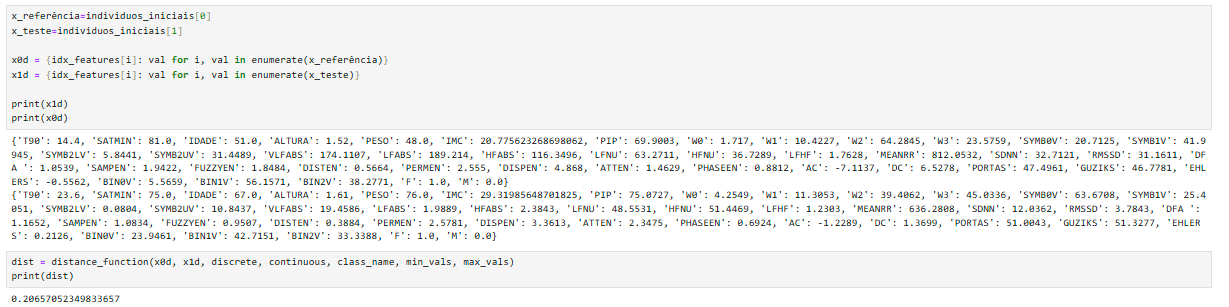

In [24]:
idx=5
def create_individual():
    return individuos_iniciais[idx] + [classes_iniciais[idx]]  

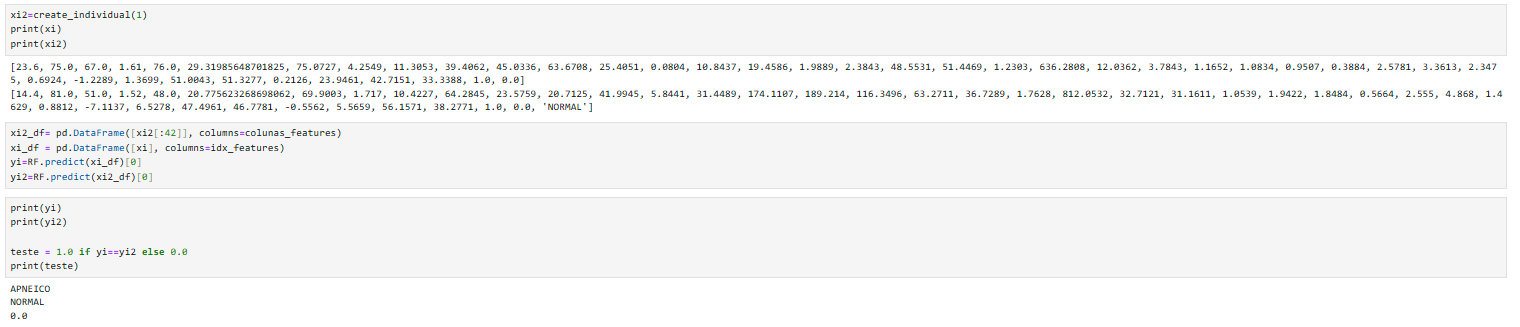

In [25]:
#Função de fitness: similar_same_outcome
def fitness_sso(x0, bb, alpha1, alpha2, eta, discrete, continuous, class_name, idx_features, distance_function, x1):
    #Converter listas para dicionários com nomes das features
    x0d = {idx_features[i]: val for i, val in enumerate(x0)}
    x1d = {idx_features[i]: val for i, val in enumerate(x1)}
    
    #Similaridade entre as instâncias
    sim_ratio = 1.0 - distance_function(x0d, x1d, discrete, continuous, class_name, min_vals, max_vals)
    record_similarity = 0.0 if sim_ratio >= eta else sim_ratio

    #Previsão com DataFrame nomeado (evita warning)
    x0_df = pd.DataFrame([x0], columns=idx_features)
    x1_df = pd.DataFrame([x1], columns=idx_features)
    y0 = bb.predict(x0_df)[0]
    y1 = bb.predict(x1_df)[0]
    
    #Similaridade de saída
    target_similarity = 1.0 if y0 == y1 else 0.0

    # Avaliação final
    evaluation = float(alpha1) * float(record_similarity) + float(alpha2) * float(target_similarity)
    return evaluation,

#Função de fitness: similar_different_outcome
def fitness_sdo(x0, bb, alpha1, alpha2, eta, discrete, continuous, class_name, idx_features, distance_function, x1):
    #Converter listas para dicionários com nomes das features
    x0d = {idx_features[i]: val for i, val in enumerate(x0)}
    x1d = {idx_features[i]: val for i, val in enumerate(x1)}

    # Similaridade entre as instâncias
    sim_ratio = 1.0 - distance_function(x0d, x1d, discrete, continuous, class_name, min_vals, max_vals)
    record_similarity = 0.0 if sim_ratio >= eta else sim_ratio

    #Previsão com DataFrame nomeado (evita o aviso de que as previsõe dentro do AG são feitas sem as labels)
    x0_df = pd.DataFrame([x0], columns=idx_features)
    x1_df = pd.DataFrame([x1], columns=idx_features)
    y0 = bb.predict(x0_df)[0]
    y1 = bb.predict(x1_df)[0]

    # Similaridade de saída invertida
    target_similarity = 1.0 if y0 != y1 else 0.0

    # Avaliação final
    evaluation = float(alpha1) * float(record_similarity) + float(alpha2) * target_similarity
    return evaluation,

## Vou adicionar as funções de fitness DDO e DSO

In [26]:
def fitness_dso(x0, bb, alpha1, alpha2, eta, discrete, continuous, class_name, idx_features, distance_function, x1):
    # dissimilar_same_outcome
    x0d = {idx_features[i]: val for i, val in enumerate(x0)}
    x1d = {idx_features[i]: val for i, val in enumerate(x1)}

    # zero if is too dissimilar
    sim_ratio = 1.0 - distance_function(x0d, x1d, discrete, continuous, class_name, min_vals, max_vals)
    record_similarity = 0.0 if sim_ratio <= eta else 1.0 - sim_ratio
    
    #Previsão com DataFrame nomeado (evita warning)
    x0_df = pd.DataFrame([x0], columns=idx_features)
    x1_df = pd.DataFrame([x1], columns=idx_features)
    y0 = bb.predict(x0_df)[0]
    y1 = bb.predict(x1_df)[0]
    
    target_similarity = 1.0 if y0 == y1 else 0.0
    
    evaluation = alpha1 * record_similarity + alpha2 * target_similarity
    return evaluation,


def fitness_ddo(x0, bb, alpha1, alpha2, eta, discrete, continuous, class_name, idx_features, distance_function, x1):
    # dissimilar_different_outcome
    x0d = {idx_features[i]: val for i, val in enumerate(x0)}
    x1d = {idx_features[i]: val for i, val in enumerate(x1)}
    
    # zero if is too dissimilar
    sim_ratio = 1.0 - distance_function(x0d, x1d, discrete, continuous, class_name, min_vals, max_vals)
    record_similarity = 0.0 if sim_ratio <= eta else 1.0 - sim_ratio
    
    #Previsão com DataFrame nomeado (evita warning)
    x0_df = pd.DataFrame([x0], columns=idx_features)
    x1_df = pd.DataFrame([x1], columns=idx_features)
    y0 = bb.predict(x0_df)[0]
    y1 = bb.predict(x1_df)[0]
    
    target_similarity = 1.0 if y0 != y1 else 0.0
    
    evaluation = alpha1 * record_similarity + alpha2 * target_similarity
    return evaluation,

In [27]:
#Reprodução, crossover do tipo aritmético
def Crossover_func(ind1, ind2, alpha=0.5, cx_prob=0.5):
    if random.random() < 1:
        for i, (x1, x2) in enumerate(zip(ind1[:-1], ind2[:-1])):  # Ignorar a última coluna (classe)
            gamma = (1. + 2. * alpha) * random.random() - alpha
            ind1[i] = (1. - gamma) * x1 + gamma * x2
            ind2[i] = gamma * x1 + (1. - gamma) * x2
        
        # Manter a classe original dos indivíduos sem alterar
        ind1[-1] = ind1[-1]  # A classe de ind1 permanece inalterada
        ind2[-1] = ind2[-1]  # A classe de ind2 permanece inalterada
        
        return ind1, ind2
    else:
        return ind1, ind2

In [28]:
# ind1 = [10, 20, 30, 40]
# ind2 = [1, 2, 3, 4]
# zip(ind1[:-1], ind2[:-1]) → [(10, 1), (20, 2), (30, 3)]

# list(enumerate(zip(ind1[:-1], ind2[:-1]))) →
# [
#   (0, (10, 1)),
#   (1, (20, 2)),
#   (2, (30, 3))
# ]

In [29]:
# ind1_test= create_individual(0)
# print(ind1_test)
# ind2_test= create_individual(1)
# print(ind2_test)

In [30]:
# print('individuo 1', ind1_test, end='\n\n')
# print('individuo 2', ind2_test, end='\n\n')
# cxpb=0.9
# ind1_cros, ind2_cros = Crossover_func(ind1_test, ind2_test,alpha=0.5)
# print('individuo 1 crossover', ind1_cros, end='\n\n')
# print('individuo 2 crossover', ind2_cros)

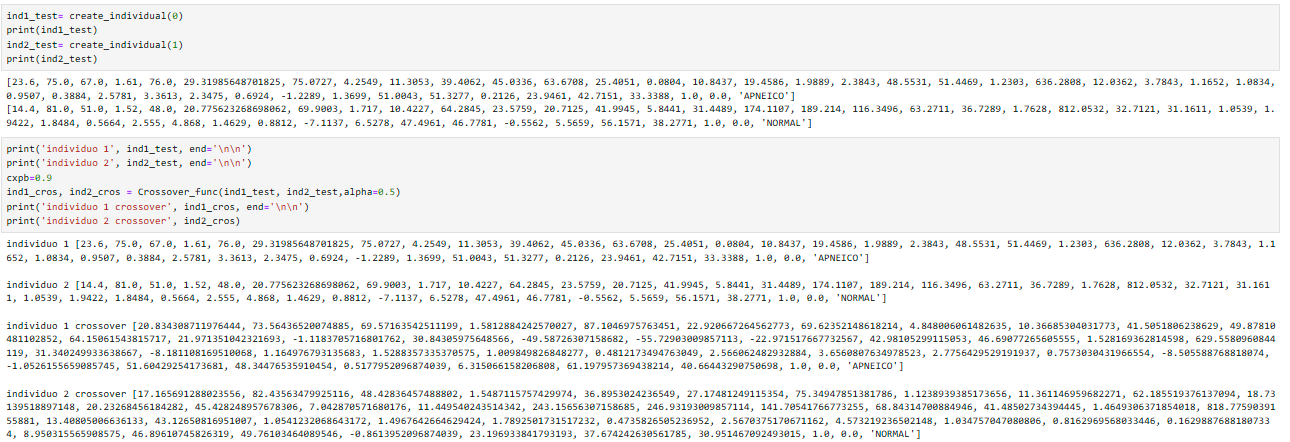

In [31]:
#Mutação
#mu é a média da distribuição gaussiana e sigma o desvio padrão
def mutGaussianWithoutClass(individual, mu, sigma, mutpb, min_vals=min_vals, max_vals=max_vals):
    # Aplica mutação apenas às características numéricas, ignorando a última posição (classe)
    for i in range(len(individual) - 1):  # Ignorar a última coluna (classe)
        if random.random() < 1:
            individual[i] += random.gauss(mu, sigma)  # Aplica a mutação nas características numéricas
            
            # Aplica o clipping se min_vals e max_vals forem fornecidos
            if min_vals is not None and max_vals is not None:
                individual[i] = np.clip(individual[i], min_vals[i], max_vals[i])

    return individual,  # Retorna o indivíduo como tupla

In [32]:
# ind1_test= create_individual(0)
# print(ind1_test)
# ind2_test= create_individual(1)
# print(ind2_test)

In [33]:
# ind1_mut=mutGaussianWithoutClass(ind1_test[:-1], 0, 1, 0.8, min_vals=min_vals, max_vals=max_vals)
# print(ind1_mut)

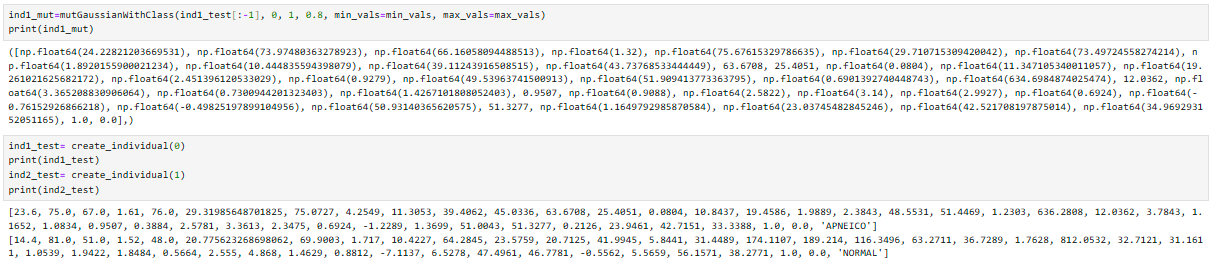

In [34]:
#Criando indivíduos que estão próximos e resultam numa mesma classe SSO
idx=5
individuo_inicial = individuos_iniciais[idx] 
xi=individuo_inicial
def evaluate(individual):
    # Parâmetros da função de fitness (exemplo)
    alpha1 = 0.5
    alpha2 = 0.5
    eta = 0.6
    discrete = []
    continuous = colunas_features
    class_name = 'CLASSE'
    idx_features = colunas_features
    # Avaliar usando a função de fitness fornecida
    return fitness_sso(individual[:42], RF, alpha1, alpha2, eta, discrete, continuous, class_name, idx_features, distance_function, xi)

# Configuração da toolbox
toolbox = base.Toolbox()
toolbox.register("individual", tools.initIterate, creator.Individual, create_individual)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("mate", Crossover_func, alpha=0.5, cx_prob=0.5)
toolbox.register("mutate", mutGaussianWithoutClass, mu=0, sigma=1, mutpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", evaluate)  # Passar o indivíduo inicial aqui

# Criar a população inicial

population = toolbox.population(n=500)
# for i, ind in enumerate(population):
#     print(f"Indivíduo {i+1}: {ind}")

# Parâmetros do algoritmo
ngen = 10  # Número de gerações
cxpb, mutpb = 0.5, 0.2  # Probabilidades de cruzamento e mutação

# Executa o algoritmo genético
result, log = algorithms.eaSimple(population, toolbox, cxpb, mutpb, ngen, verbose=False)

# Exibir o melhor resultado
best_individual = tools.selBest(population, 1)[0]
print(f"Melhor indivíduo: {best_individual}, Fitness: {best_individual.fitness.values}")

# Filtrar e armazenar os novos indivíduos gerados
novos_individuos_SSO = [ind[:42] for ind in population]  # Pegando apenas as características

print(f"Novos indivíduos gerados: {novos_individuos_SSO}")

Melhor indivíduo: [np.float64(1.733402309450444), np.float64(91.01291377501148), np.float64(46.4064921863889), np.float64(0.8964576294120092), np.float64(98.9088419966468), np.float64(30.26234158018899), np.float64(56.18728634293893), np.float64(7.060587471394486), np.float64(35.603343119370635), np.float64(43.455959145552015), np.float64(15.316405096818904), np.float64(54.70810641621119), np.float64(34.85323107645213), np.float64(0.7316806099198494), np.float64(4.697883066258237), np.float64(456.14960214451247), np.float64(142.45725476749712), np.float64(41.339553332692816), np.float64(74.67274502465001), np.float64(29.728188107298337), np.float64(3.0055493035405956), np.float64(935.7644809872968), np.float64(41.28563267982722), np.float64(13.982731948593408), np.float64(1.5262844851407245), np.float64(2.7034149654882547), np.float64(1.418689297839547), np.float64(0.7461908535581296), np.float64(2.6020734791357363), np.float64(0.7623007520775662), np.float64(2.6011931610281316), np.fl

In [35]:
#Criando indivíduos que estão próximos mas resultam em um classe diferente SDO
idx=5
individuo_inicial = individuos_iniciais[idx] 
xi=individuo_inicial

def evaluate(individual):
    # Parâmetros da função de fitness (exemplo)
    alpha1 = 0.5
    alpha2 = 0.5
    eta = 0.3
    discrete = []
    continuous = colunas_features
    class_name = 'CLASSE'
    idx_features = colunas_features
    # Avaliar usando a função de fitness fornecida
    return fitness_sdo(individual[:42], RF, alpha1, alpha2, eta, discrete, continuous, class_name, idx_features, distance_function, xi)

# Configuração da toolbox
toolbox = base.Toolbox()
toolbox.register("individual", tools.initIterate, creator.Individual, create_individual)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("mate", Crossover_func, alpha=0.5, cx_prob=0.5)
toolbox.register("mutate", mutGaussianWithoutClass, mu=0, sigma=1, mutpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", evaluate)  # Passar o indivíduo inicial aqui

# Criar a população inicial
population = toolbox.population(n=500)

# Parâmetros do algoritmo
ngen = 10 # Número de gerações
cxpb, mutpb = 0.5, 0.2 # Dento do eaSimple

# Executa o algoritmo genético
result, log = algorithms.eaSimple(population, toolbox, cxpb, mutpb, ngen, verbose=False)

# Exibir o melhor resultado
best_individual = tools.selBest(population, 1)[0]
print(f"Melhor indivíduo: {best_individual[:-1]}, Fitness: {best_individual.fitness.values}")

# Filtrar e armazenar os novos indivíduos gerados
novos_individuos_SDO= [ind[:42] for ind in population]  # Pegando apenas as características

print(f"Novos indivíduos gerados: {novos_individuos_SDO}")

Melhor indivíduo: [np.float64(4.3259063640413835), np.float64(80.38102237576312), np.float64(47.33560797639949), np.float64(1.575489291119377), np.float64(93.67216985434968), np.float64(32.994790726752775), np.float64(51.44425282710668), np.float64(10.208937785719753), np.float64(35.926344040401915), np.float64(44.21898856671779), np.float64(17.448551981094454), np.float64(54.119040637231876), np.float64(34.60373719118482), np.float64(2.797733265271266), np.float64(5.329117698159682), np.float64(453.92204734368124), np.float64(134.0474928544789), np.float64(42.592758552825906), np.float64(78.37046513715259), np.float64(19.958450270755616), np.float64(0.3525007323080027), np.float64(939.361847623096), np.float64(38.632367935380174), np.float64(17.059104090922634), np.float64(0.356), np.float64(0.8429), np.float64(2.060569828807719), np.float64(0.6320144439337887), np.float64(2.259), np.float64(4.376583908037223), np.float64(2.9927), np.float64(0.6924), np.float64(-4.985918548910015), np

In [36]:
# #Criando indivíduos que estão próximos mas resultam em um classe diferente DSO
# individuo_inicial = individuos_iniciais[idx] 
# xi=individuo_inicial

# def evaluate(individual):
#     # Parâmetros da função de fitness (exemplo)
#     alpha1 = 0.5
#     alpha2 = 1
#     eta = 0.1
#     discrete = []
#     continuous = colunas_features
#     class_name = 'CLASSE'
#     idx_features = colunas_features
#     # Avaliar usando a função de fitness fornecida
#     return fitness_dso(individual[:42], RF, alpha1, alpha2, eta, discrete, continuous, class_name, idx_features, distance_function, xi)

# # Configuração da toolbox
# toolbox = base.Toolbox()
# toolbox.register("individual", tools.initIterate, creator.Individual, create_individual)
# toolbox.register("population", tools.initRepeat, list, toolbox.individual)
# toolbox.register("mate", Crossover_func, alpha=0.5, cx_prob=0.5)
# toolbox.register("mutate", mutGaussianWithoutClass, mu=0, sigma=1, mutpb=0.5)
# toolbox.register("select", tools.selTournament, tournsize=3)
# toolbox.register("evaluate", evaluate)  # Passar o indivíduo inicial aqui

# # Criar a população inicial
# population = toolbox.population(n=250)

# # Parâmetros do algoritmo
# ngen = 10 # Número de gerações
# cxpb, mutpb = 0.5, 0.5 # Dento do eaSimple

# # Executa o algoritmo genético
# result, log = algorithms.eaSimple(population, toolbox, cxpb, mutpb, ngen, verbose=False)

# # Exibir o melhor resultado
# best_individual = tools.selBest(population, 1)[0]
# print(f"Melhor indivíduo: {best_individual[:-1]}, Fitness: {best_individual.fitness.values}")

# # Filtrar e armazenar os novos indivíduos gerados
# novos_individuos_DSO= [ind[:42] for ind in population]  # Pegando apenas as características

# print(f"Novos indivíduos gerados: {novos_individuos_DSO}")

In [37]:
# #Criando indivíduos que estão próximos mas resultam em um classe diferente DDO
# individuo_inicial = individuos_iniciais[idx] 
# xi=individuo_inicial

# def evaluate(individual):
#     # Parâmetros da função de fitness (exemplo)
#     alpha1 = 0.5
#     alpha2 = 1
#     eta = 0.1
#     discrete = []
#     continuous = colunas_features
#     class_name = 'CLASSE'
#     idx_features = colunas_features
#     # Avaliar usando a função de fitness fornecida
#     return fitness_ddo(individual[:42], RF, alpha1, alpha2, eta, discrete, continuous, class_name, idx_features, distance_function, xi)

# # Configuração da toolbox
# toolbox = base.Toolbox()
# toolbox.register("individual", tools.initIterate, creator.Individual, create_individual)
# toolbox.register("population", tools.initRepeat, list, toolbox.individual)
# toolbox.register("mate", Crossover_func, alpha=0.5, cx_prob=0.5)
# toolbox.register("mutate", mutGaussianWithoutClass, mu=0, sigma=1, mutpb=0.5)
# toolbox.register("select", tools.selTournament, tournsize=3)
# toolbox.register("evaluate", evaluate)  # Passar o indivíduo inicial aqui

# # Criar a população inicial
# population = toolbox.population(n=250)

# # Parâmetros do algoritmo
# ngen = 10 # Número de gerações
# cxpb, mutpb = 0.5, 0.5 # Dento do eaSimple

# # Executa o algoritmo genético
# result, log = algorithms.eaSimple(population, toolbox, cxpb, mutpb, ngen, verbose=False)

# # Exibir o melhor resultado
# best_individual = tools.selBest(population, 1)[0]
# print(f"Melhor indivíduo: {best_individual[:-1]}, Fitness: {best_individual.fitness.values}")

# # Filtrar e armazenar os novos indivíduos gerados
# novos_individuos_DDO= [ind[:42] for ind in population]  # Pegando apenas as características

# print(f"Novos indivíduos gerados: {novos_individuos_DDO}")

In [38]:
SSO=pd.DataFrame(novos_individuos_SSO)
SDO=pd.DataFrame(novos_individuos_SDO)
#DDO=pd.DataFrame(novos_individuos_DDO)
#DSO=pd.DataFrame(novos_individuos_DSO)
SSO.head()

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,1.726043,89.187506,46.465304,0.928201,82.604067,30.516346,54.985007,6.668750,34.370179,43.416884,...,-7.858460,2.217144,50.079108,51.983659,-1.182490,28.998010,53.355885,18.249625,1.370684,0.823189
1,0.156589,89.145574,47.945488,1.471879,102.922477,29.422822,55.488430,8.562413,35.272963,43.034429,...,-7.556760,3.186829,50.071570,50.988382,-0.800571,29.189778,53.664779,18.344311,0.182176,0.962490
2,0.315403,94.509482,48.341245,2.030063,98.328067,29.984819,57.436499,7.448028,33.651222,42.498891,...,-8.006047,3.600228,45.870158,53.798962,1.670998,26.867398,56.199749,15.020233,0.326089,0.175616
3,0.000000,86.339654,49.150228,1.638038,97.802570,28.682618,55.678333,9.056797,33.238668,42.677375,...,-3.272122,6.181708,50.193858,52.081643,2.390479,25.596460,54.651214,17.634982,0.232490,0.174985
4,0.189325,89.066047,47.957557,1.713622,98.917252,29.611997,54.232225,8.844532,34.311157,43.580239,...,-4.742153,5.160604,49.621275,52.567176,2.434233,25.385189,55.021837,17.369006,0.000000,0.983199


In [39]:
SDO.head()

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,0.000000,85.397791,50.057311,1.950000,99.801038,30.129063,53.908294,7.450203,34.815405,42.043168,...,-3.514768,2.971414,52.697719,51.506770,1.106132,27.563203,55.726050,22.400616,1.000000,1.000000
1,-0.276951,90.452490,47.310896,1.607505,99.087008,29.543038,54.612133,7.631662,33.257750,42.336961,...,-5.946938,3.113689,50.221533,52.741012,0.272039,25.227906,53.947617,18.980859,-0.000766,0.708143
2,4.199546,88.342628,46.337620,1.950000,107.431749,29.469639,56.855651,9.192575,33.276268,47.279543,...,-6.916219,3.920322,53.232355,44.763459,-2.387300,27.912080,56.612417,17.041639,0.141663,1.000000
3,4.325906,80.381022,47.335608,1.575489,93.672170,32.994791,51.444253,10.208938,35.926344,44.218989,...,-4.985919,2.029004,51.401141,56.650581,2.298014,29.106154,52.699850,16.577901,0.000000,0.000000
4,1.832960,90.036218,48.351117,1.640669,98.387815,31.003930,55.169873,7.291987,35.304388,43.515288,...,-6.646799,3.870171,50.994079,52.112564,1.887631,26.546197,53.985308,17.880780,1.097282,0.890764


In [40]:
#DDO.head()

In [41]:
#DSO.head()

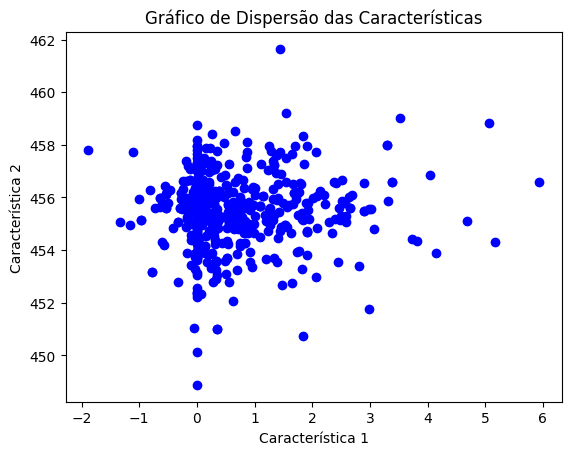

In [42]:
import matplotlib.pyplot as plt

plt.scatter(SSO[0], SSO[15], c='b')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.title('Gráfico de Dispersão das Características')
plt.show()

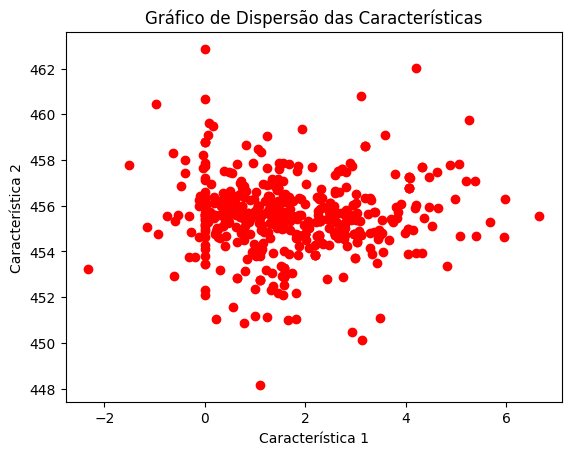

In [43]:
import matplotlib.pyplot as plt

plt.scatter(SDO[0], SDO[15], c='r')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.title('Gráfico de Dispersão das Características')
plt.show()

In [44]:
print(xi)

[0.1, 89.0, 48.0, 1.83, 99.0, 29.56194571351787, 55.0404, 7.8663, 34.2416, 42.7749, 15.1172, 55.2466, 36.39, 1.5441, 6.8193, 455.5005, 140.9598, 41.6113, 74.8181, 25.1819, 3.3932, 940.8828, 41.1181, 12.6073, 1.5935, 1.5317, 1.0143, 0.5895, 2.4482, 3.6933, 2.4551, 0.9129, -6.2592, 4.5254, 50.209, 51.9575, 0.9313, 27.1667, 54.967, 17.8663, 0.0, 1.0]


In [45]:
XSSO=SSO.iloc[:, :42].values
XSDO=SDO.iloc[:, :42].values
#XDDO=DDO.iloc[:, :42].values
#XDSO=DSO.iloc[:, :42].values

In [46]:
XTOTAL = pd.concat([SSO, SDO], ignore_index=True)
XTOTAL.head()

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,1.726043,89.187506,46.465304,0.928201,82.604067,30.516346,54.985007,6.668750,34.370179,43.416884,...,-7.858460,2.217144,50.079108,51.983659,-1.182490,28.998010,53.355885,18.249625,1.370684,0.823189
1,0.156589,89.145574,47.945488,1.471879,102.922477,29.422822,55.488430,8.562413,35.272963,43.034429,...,-7.556760,3.186829,50.071570,50.988382,-0.800571,29.189778,53.664779,18.344311,0.182176,0.962490
2,0.315403,94.509482,48.341245,2.030063,98.328067,29.984819,57.436499,7.448028,33.651222,42.498891,...,-8.006047,3.600228,45.870158,53.798962,1.670998,26.867398,56.199749,15.020233,0.326089,0.175616
3,0.000000,86.339654,49.150228,1.638038,97.802570,28.682618,55.678333,9.056797,33.238668,42.677375,...,-3.272122,6.181708,50.193858,52.081643,2.390479,25.596460,54.651214,17.634982,0.232490,0.174985
4,0.189325,89.066047,47.957557,1.713622,98.917252,29.611997,54.232225,8.844532,34.311157,43.580239,...,-4.742153,5.160604,49.621275,52.567176,2.434233,25.385189,55.021837,17.369006,0.000000,0.983199


In [47]:
print("XTOTAL shape:", XTOTAL.shape)
print("df.columns[2:] length:", len(df.columns[2:]))

XTOTAL shape: (1000, 42)
df.columns[2:] length: 42


In [48]:
XTOTAL_df = pd.DataFrame(XTOTAL.to_numpy(), columns=df.columns[2:])
XTOTAL_df

,T90,SATMIN,IDADE,ALTURA,PESO,IMC,PIP,W0,W1,W2,...,AC,DC,PORTAS,GUZIKS,EHLERS,BIN0V,BIN1V,BIN2V,F,M
0,1.726043,89.187506,46.465304,0.928201,82.604067,30.516346,54.985007,6.668750,34.370179,43.416884,...,-7.858460,2.217144,50.079108,51.983659,-1.182490,28.998010,53.355885,18.249625,1.370684,0.823189
1,0.156589,89.145574,47.945488,1.471879,102.922477,29.422822,55.488430,8.562413,35.272963,43.034429,...,-7.556760,3.186829,50.071570,50.988382,-0.800571,29.189778,53.664779,18.344311,0.182176,0.962490
2,0.315403,94.509482,48.341245,2.030063,98.328067,29.984819,57.436499,7.448028,33.651222,42.498891,...,-8.006047,3.600228,45.870158,53.798962,1.670998,26.867398,56.199749,15.020233,0.326089,0.175616
3,0.000000,86.339654,49.150228,1.638038,97.802570,28.682618,55.678333,9.056797,33.238668,42.677375,...,-3.272122,6.181708,50.193858,52.081643,2.390479,25.596460,54.651214,17.634982,0.232490,0.174985
4,0.189325,89.066047,47.957557,1.713622,98.917252,29.611997,54.232225,8.844532,34.311157,43.580239,...,-4.742153,5.160604,49.621275,52.567176,2.434233,25.385189,55.021837,17.369006,0.000000,0.983199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.912533,85.188859,47.978666,2.123658,100.678388,32.321162,54.894477,10.019161,36.987645,44.570955,...,-4.504625,3.363776,49.584016,51.187088,0.962123,26.827068,50.260614,19.026907,0.329666,1.125894
996,3.792547,89.041648,45.166175,1.488598,100.289808,30.926634,55.660683,10.946504,37.460044,42.136190,...,-5.776337,5.253653,50.542310,50.099842,-3.028144,26.273496,54.040716,16.234215,0.714540,0.872974
997,3.978086,89.573506,46.385276,1.732840,100.282747,30.346755,56.089368,5.122188,30.800409,38.665006,...,-5.699079,5.249940,47.809210,52.028995,0.723367,25.650797,49.574143,17.687202,-0.360433,1.069701
998,2.496425,85.757347,48.908763,1.526892,99.913691,27.372064,55.695298,7.612626,36.160811,43.181242,...,-9.194613,6.008463,51.154587,52.544617,1.644527,27.889112,51.140960,18.695988,0.000000,0.000000


In [49]:
ytotal= RF.predict(XTOTAL_df)
pd.Series(ytotal).value_counts()

NORMAL     680
APNEICO    320
Name: count, dtype: int64

In [50]:
import pandas as pd
y_series = pd.Series(ytotal, name="label")
dfb= XTOTAL_df.copy()
dfb["label"] = y_series

# Descobre o tamanho da menor classe
min_count = y_series.value_counts().min()

# Balanceia o conjunto
balanced_df = dfb.groupby("label").sample(n=min_count, random_state=42)
print(balanced_df)

# Separa novamente X e y
Xb = balanced_df.drop(columns="label")
yb = balanced_df["label"] 

          T90     SATMIN      IDADE    ALTURA        PESO        IMC  \
752  1.089205  87.413965  48.881631  1.320000  101.429669  27.730596   
862  4.205816  87.309891  51.537789  2.034014  100.172968  27.773545   
529  3.194675  83.361995  48.777829  1.435806  101.845087  29.819561   
591  3.194675  83.361995  48.777829  1.435806  101.845087  29.819561   
419  1.256427  84.080508  46.339045  1.816360   98.710090  30.250771   
..        ...        ...        ...       ...         ...        ...   
79  -1.157656  86.671061  47.787112  1.339627  101.023646  29.765766   
86   0.017610  86.112533  46.599096  1.950000   98.121725  33.611464   
371  0.637196  90.689934  51.439717  1.958027   99.254320  30.366884   
84   0.970712  87.736048  46.714583  1.320000   96.892407  29.684552   
450  1.339773  88.482060  50.604619  1.950000  101.891839  31.571471   

           PIP         W0         W1         W2  ...        DC     PORTAS  \
752  56.209825   7.740444  31.557339  42.064597  ...  3.19

In [51]:
yb.value_counts()

label
APNEICO    320
NORMAL     320
Name: count, dtype: int64

In [52]:
from sklearn.tree import DecisionTreeClassifier
ClassificadorDT = DecisionTreeClassifier(max_depth=5, random_state=42)
ClassificadorDT.fit(Xb, yb)

DecisionTreeClassifier(max_depth=5, random_state=42)

## Implementando a Árvore de Decisão

In [54]:
xiarray = np.array(xi).reshape(1, -1)
xi_df = pd.DataFrame(xiarray, columns=colunas_features)
print(xi_df)

   T90  SATMIN  IDADE  ALTURA  PESO        IMC      PIP      W0       W1  \
0  0.1    89.0   48.0    1.83  99.0  29.561946  55.0404  7.8663  34.2416   

        W2  ...      AC      DC  PORTAS   GUZIKS  EHLERS    BIN0V   BIN1V  \
0  42.7749  ... -6.2592  4.5254  50.209  51.9575  0.9313  27.1667  54.967   

     BIN2V    F    M  
0  17.8663  0.0  1.0  

[1 rows x 42 columns]


In [61]:
print(predicT[5])
#print(y_T.head(5))

NORMAL


In [56]:
Explicando=ClassificadorDT.predict(xi_df)
print(Explicando)

['NORMAL']


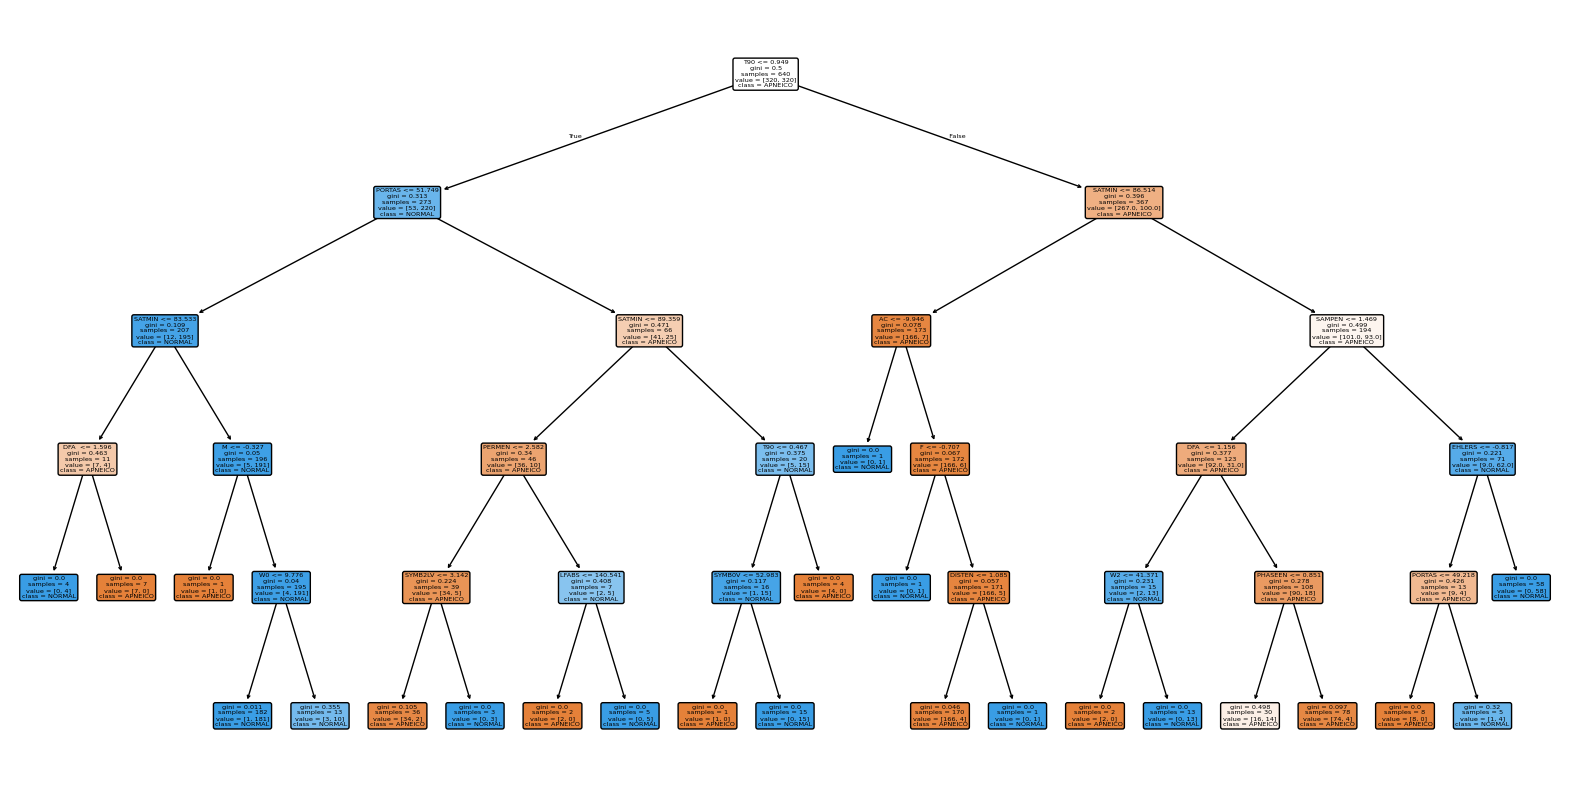

In [57]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(ClassificadorDT, filled=True, feature_names=colunas_features, class_names=classes_iniciais, rounded=True)
plt.savefig("arvore_decisao.png", dpi=300, bbox_inches='tight')  # salva como PNG com boa resolução
plt.show()

In [58]:
from sklearn.tree import _tree
xi = np.array(xi).reshape(1, -1)  
xi_df = pd.DataFrame(xi, columns=colunas_features)
Explicando=ClassificadorDT.predict(xi_df)

node_indicator = ClassificadorDT.decision_path(xi_df)
node_index = node_indicator.indices
print("Nós percorridos para essa amostra:", node_indicator)
    
thresholds = ClassificadorDT.tree_.threshold
features = ClassificadorDT.tree_.feature
children_left = ClassificadorDT.tree_.children_left
children_right = ClassificadorDT.tree_.children_right
    
for node_id in node_index:
    f_index = features[node_id]      # índice da feature usada no nó
    thresh = thresholds[node_id]     # limiar do nó

    # verifica se é um nó de decisão (não folha)
    if f_index >= 0:
        val = xi[0][f_index]         # valor da feature da amostra
        feature_name = xi_df.columns[f_index]  # nome da feature

        cond = "SATISFEITA" if val <= thresh else "NÃO SATISFEITA"
        print(f"Nó {node_id}: {feature_name} = {val:.3f}, condição testada: {feature_name} <= {thresh:.3f} → {cond}")
    else:
        print(f"Nó {node_id}: folha alcançada.")

Nós percorridos para essa amostra: <Compressed Sparse Row sparse matrix of dtype 'int64'
	with 6 stored elements and shape (1, 45)>
  Coords	Values
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 6)	1
  (0, 8)	1
  (0, 9)	1
Nó 0: T90 = 0.100, condição testada: T90 <= 0.949 → SATISFEITA
Nó 1: PORTAS = 50.209, condição testada: PORTAS <= 51.749 → SATISFEITA
Nó 2: SATMIN = 89.000, condição testada: SATMIN <= 83.533 → NÃO SATISFEITA
Nó 6: M = 1.000, condição testada: M <= -0.327 → NÃO SATISFEITA
Nó 8: W0 = 7.866, condição testada: W0 <= 9.776 → SATISFEITA
Nó 9: folha alcançada.


In [59]:
#Decision_path retorna uma matriz esparsa, 
#Um objeto do tipo scipy.sparse.csr_matrix com forma (n_samples, n_nodes), onde:
#n_samples é o número de amostras em xi (conjunto de dados que queremos os caminhos percorridos, no nosso caso é apenas um indivíduo).
#n_nodes é o número total de nós na árvore.
#Se node_indicator[i, j] = 1, significa que a amostra i passou pelo nó j.

In [60]:
def get_decision_path(ClassificadorDT, xi_df, feature_names):
    """
    Retorna um dicionário com os nós percorridos e as decisões tomadas.
    """
    node_indicator = ClassificadorDT.decision_path(xi_df)
    leaf_id = ClassificadorDT.apply(xi_df)[0]  # Nó final

    feature = ClassificadorDT.tree_.feature
    threshold = ClassificadorDT.tree_.threshold

    decision_dict = {}
    xi_array = xi_df.values  # para acessar os valores numéricos

    for node_id in node_indicator.indices:
        if leaf_id == node_id:
            decision_dict[f"Nó {node_id}"] = "Folha"
        else:
            feature_index = feature[node_id]
            threshold_value = threshold[node_id]
            feature_name = feature_names[feature_index]
            sample_value = xi_array[0, feature_index]  # aqui pode usar vírgula

            decision = f"{feature_name} <= {threshold_value}" if sample_value <= threshold_value else f"{feature_name} > {threshold_value}"
            decision_dict[f"Nó {node_id}"] = decision

    return decision_dict

feature_names_exp = colunas_features
Explicação = get_decision_path(ClassificadorDT, xi_df, feature_names_exp)
print(Explicação)

{'Nó 0': 'T90 <= 0.9492548704147339', 'Nó 1': 'PORTAS <= 51.74873924255371', 'Nó 2': 'SATMIN > 83.53345489501953', 'Nó 6': 'M > -0.32658401131629944', 'Nó 8': 'W0 <= 9.776115894317627', 'Nó 9': 'Folha'}
